In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the bike sharing database.

In [3]:
bike_day_df_raws = pd.read_csv('day.csv')

In [4]:
bike_day_df_raws.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [5]:
bike_day_df_raws.shape

(730, 16)

In [6]:
bike_day_df_raws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_day_df_raws.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Task 2: Cleaning the Data

-  ### Subtask 2.1: Drop unecessary columns

In [8]:
bike_day_df_raws = bike_day_df_raws.drop(['instant', 'dteday', 'casual' , 'registered'], axis=1)

In [9]:
bike_day_df_raws.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


-  ### Subtask 2.2: Inspect Null values

In [10]:
bike_day_df_raws.isnull().sum(axis = 0)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

-  ### Subtask 2.3: Convert Categorical Data to Object

In [11]:
# variables to map

# season 
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Applying the function to the housing list
bike_day_df_raws[['season']] = bike_day_df_raws[['season']].apply(season_map)

# mnth
def mnth_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Applying the function to the housing list
bike_day_df_raws[['mnth']] = bike_day_df_raws[['mnth']].apply(mnth_map)

# weekday
def weekday_map(x):
    return x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

# Applying the function to the housing list
bike_day_df_raws[['weekday']] = bike_day_df_raws[['weekday']].apply(weekday_map)

# weathersit
def weathersit_map(x):
    return x.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

# Applying the function to the housing list
bike_day_df_raws[['weathersit']] = bike_day_df_raws[['weathersit']].apply(weathersit_map)

In [12]:
bike_day_df_raws.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Task 3: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

#### 3.1 Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

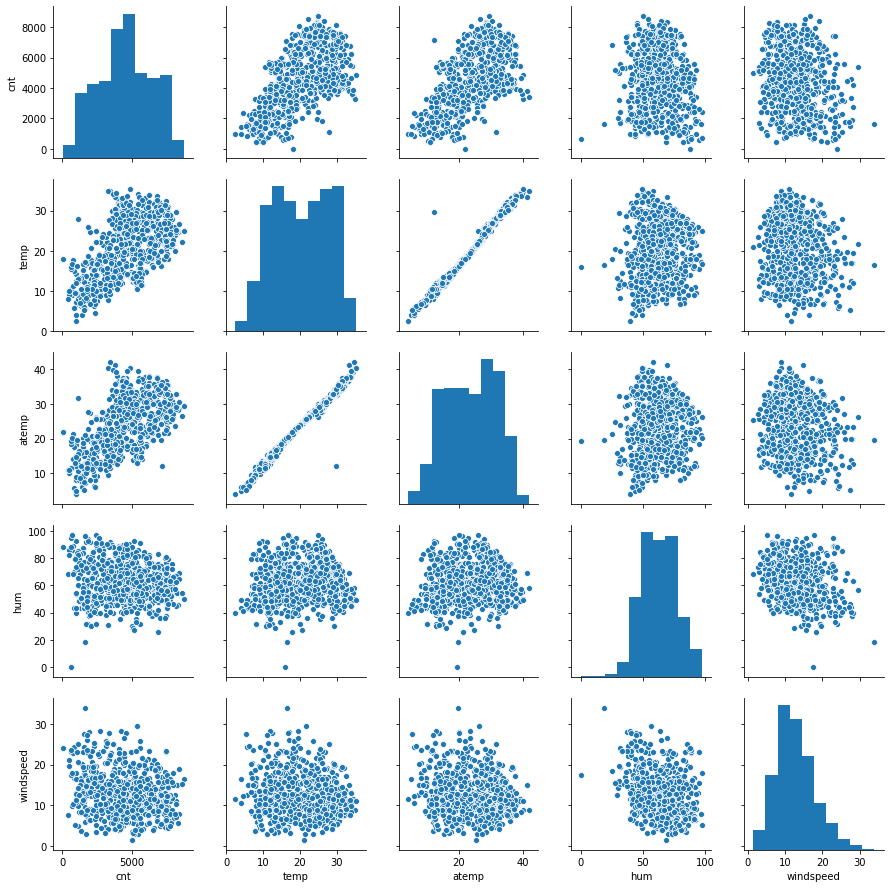

In [13]:
sns.pairplot(bike_day_df_raws, vars=["cnt", "temp", "atemp", "hum", "windspeed"])
plt.show()

#### 3.2 Correlation between the variables

In [14]:
bike_day_df_raws.corr(method ='pearson') 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### 3.3 Continous Variables

Text(0, 0.5, 'Count of all Biks Rented')

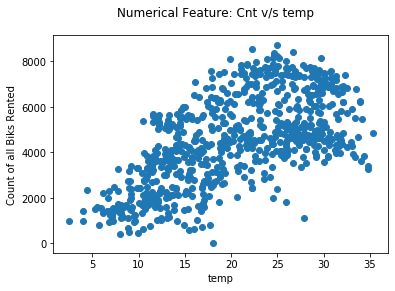

In [15]:
plt.scatter(bike_day_df_raws['temp'], bike_day_df_raws['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

As per the scatter plot we can see their is a liner relation between number of bike rented and temperature the warmmer the temp the more bike get rented

Text(0, 0.5, 'Count of all Biks Rented')

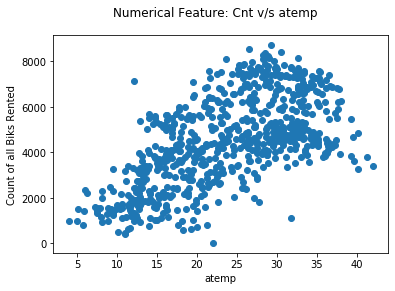

In [16]:
plt.scatter(bike_day_df_raws['atemp'], bike_day_df_raws['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

As we can see both the feature 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity. to keep things clean we can drop the 'atemp' feature

In [17]:
# Dropping the atemp continous variable
bike_day_df_raws = bike_day_df_raws.drop(['atemp'], axis=1)

Text(0, 0.5, 'Count of all Biks Rented')

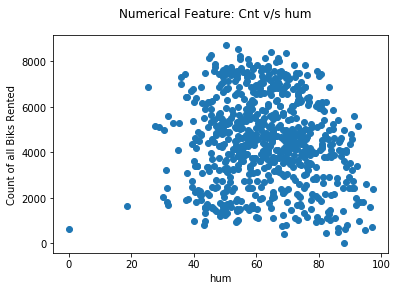

In [18]:
plt.scatter(bike_day_df_raws['hum'], bike_day_df_raws['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

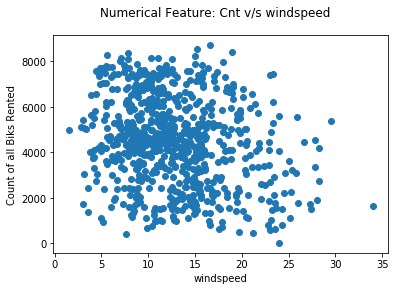

In [19]:
plt.scatter(bike_day_df_raws['windspeed'], bike_day_df_raws['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

For 'hum' or humidity looks like a big blob throught the edges so show some sparseness. and for feature 'windspeed' shows inverse relationship with rentals

For conculsion we can say too much wind and bike rentals dont seem to mix

#### 3.4 Categorical Variables

In [20]:
bike_day_df_raws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


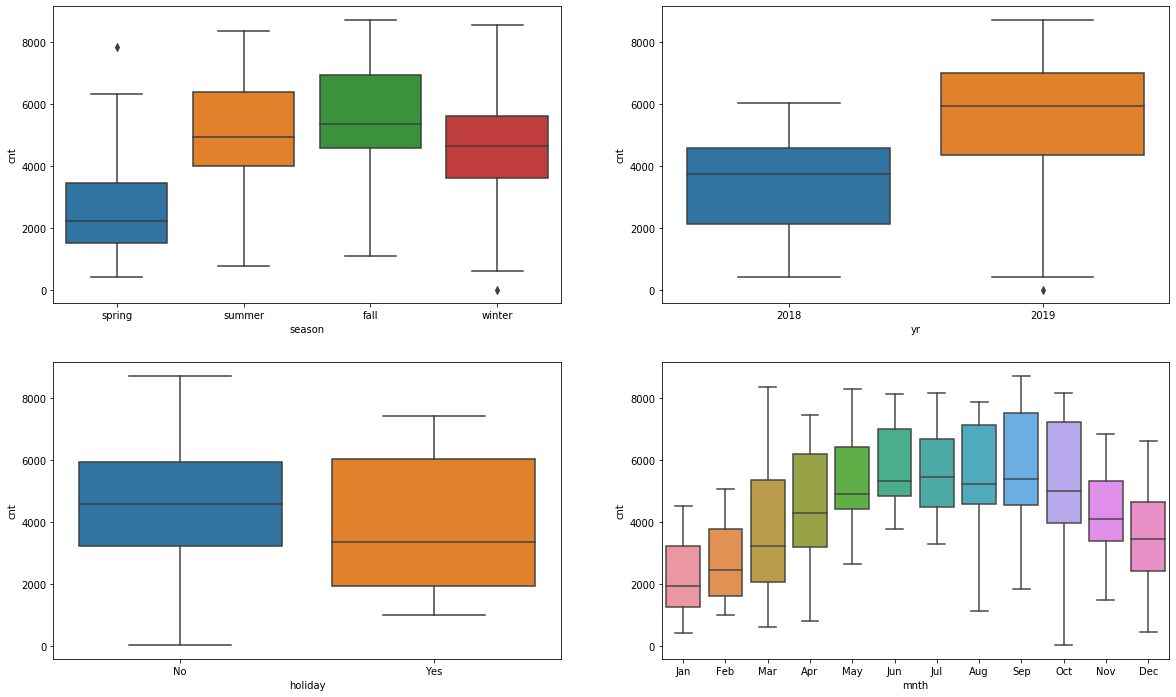

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
ax = sns.boxplot(x = 'season', y = 'cnt', data = bike_day_df_raws)

plt.subplot(2,2,2)
ax = sns.boxplot(x = 'yr', y = 'cnt', data = bike_day_df_raws)
ax.set_xticklabels(labels=['2018', '2019'])

plt.subplot(2,2,3)
ax = sns.boxplot(x = 'holiday', y = 'cnt', data = bike_day_df_raws)
ax.set_xticklabels(labels=['No', 'Yes'])

plt.subplot(2,2,4)
ax = sns.boxplot(x = 'mnth', y = 'cnt', data = bike_day_df_raws)

plt.show()

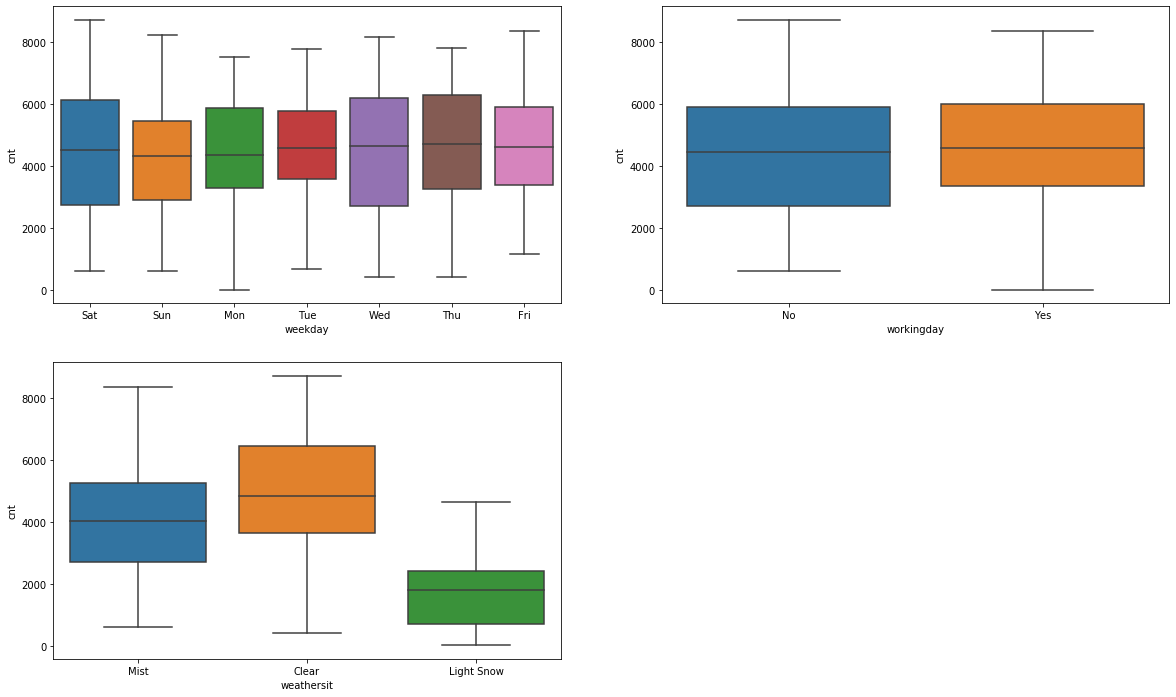

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
ax = sns.boxplot(x = 'weekday', y = 'cnt', data = bike_day_df_raws)

plt.subplot(2,2,2)
ax = sns.boxplot(x = 'workingday', y = 'cnt', data = bike_day_df_raws)
ax.set_xticklabels(labels=['No', 'Yes'])

plt.subplot(2,2,3)
ax = sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_day_df_raws)

plt.show()

The above graph of 'weathersit' shows that people tends to rent more bike in `clear` weather and 'season' show the `fall` is the top season to rent bike.

## Step 4: Data Preparation

In most case to make a machine learning model we need to clean the data and here we have done the cleaning in order to be 'model ready', we have alredy drop some unused feature we have no null values.

### Dummy Variables

In [23]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(bike_day_df_raws['season'])

In [24]:
# Check what the dataset 'status' looks like
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, you don't need four columns. You can drop the `fall` column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [25]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bike_day_df_raws['season'], drop_first = True)

In [26]:
# Add the results to the original housing dataframe

bike_day_df_raws = pd.concat([bike_day_df_raws, status], axis = 1)

In [27]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'status'
status = pd.get_dummies(bike_day_df_raws['mnth'])

In [28]:
# Check what the dataset 'status' looks like
status.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


Now, you don't need twelve columns. You can drop the `April` column, as the type of season can be identified with just the last Eleven columns where — 
- `00000000000` will correspond to `April`
- `00000000001` will correspond to `September`
- `00000000010` will correspond to `October`
- `00000000100` will correspond to `November`
- `00000001000` will correspond to `May`
- `00000010000` will correspond to `March`
- `00000100000` will correspond to `June`
- `00001000000` will correspond to `July`
- `00010000000` will correspond to `January`
- `00100000000` will correspond to `February`
- `01000000000` will correspond to `December`
- `10000000000` will correspond to `August`

In [29]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bike_day_df_raws['mnth'], drop_first = True)

# Add the results to the original housing dataframe

bike_day_df_raws = pd.concat([bike_day_df_raws, status], axis = 1)

In [30]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'status'
status = pd.get_dummies(bike_day_df_raws['weekday'])

# Check what the dataset 'status' looks like
status.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


Now, you don't need seven columns. You can drop the `Fri` column, as the type of season can be identified with just the last six columns where — 
- `000000` will correspond to `Friday`
- `000001` will correspond to `Wednesday`
- `000010` will correspond to `Tuesday`
- `000100` will correspond to `Thursday`
- `001000` will correspond to `Sunday`
- `010000` will correspond to `Saturday`
- `100000` will correspond to `Monday`

In [31]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bike_day_df_raws['weekday'], drop_first = True)

# Add the results to the original housing dataframe

bike_day_df_raws = pd.concat([bike_day_df_raws, status], axis = 1)

In [32]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'
status = pd.get_dummies(bike_day_df_raws['weathersit'])

# Check what the dataset 'status' looks like
status.head()

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need seven columns. You can drop the `Clear` column, as the type of weather can be identified with just the last two columns where — 
- `00` will correspond to `Clear`
- `01` will correspond to `Mist`
- `10` will correspond to `Light Snow`

In [33]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bike_day_df_raws['weathersit'], drop_first = True)

# Add the results to the original housing dataframe

bike_day_df_raws = pd.concat([bike_day_df_raws, status], axis = 1)

In [34]:
# Now let's see the head of our dataframe.

bike_day_df_raws.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [35]:
# Drop 'season', 'mnth', 'weekday', 'weathersit' as we have created the dummies for it

bike_day_df_raws.drop(['season'], axis = 1, inplace = True)
bike_day_df_raws.drop(['mnth'], axis = 1, inplace = True)
bike_day_df_raws.drop(['weekday'], axis = 1, inplace = True)
bike_day_df_raws.drop(['weathersit'], axis = 1, inplace = True)

In [36]:
bike_day_df_raws.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
bike_day_df_raws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
Aug           730 non-null uint8
Dec           730 non-null uint8
Feb           730 non-null uint8
Jan           730 non-null uint8
Jul           730 non-null uint8
Jun           730 non-null uint8
Mar           730 non-null uint8
May           730 non-null uint8
Nov           730 non-null uint8
Oct           730 non-null uint8
Sep           730 non-null uint8
Mon           730 non-null uint8
Sat           730 non-null uint8
Sun           730 non-null uint8
Thu           730 non-null uint8
Tue           730 non-null uint8
Wed           730 non-null uint

## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [38]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_day_df_raws, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


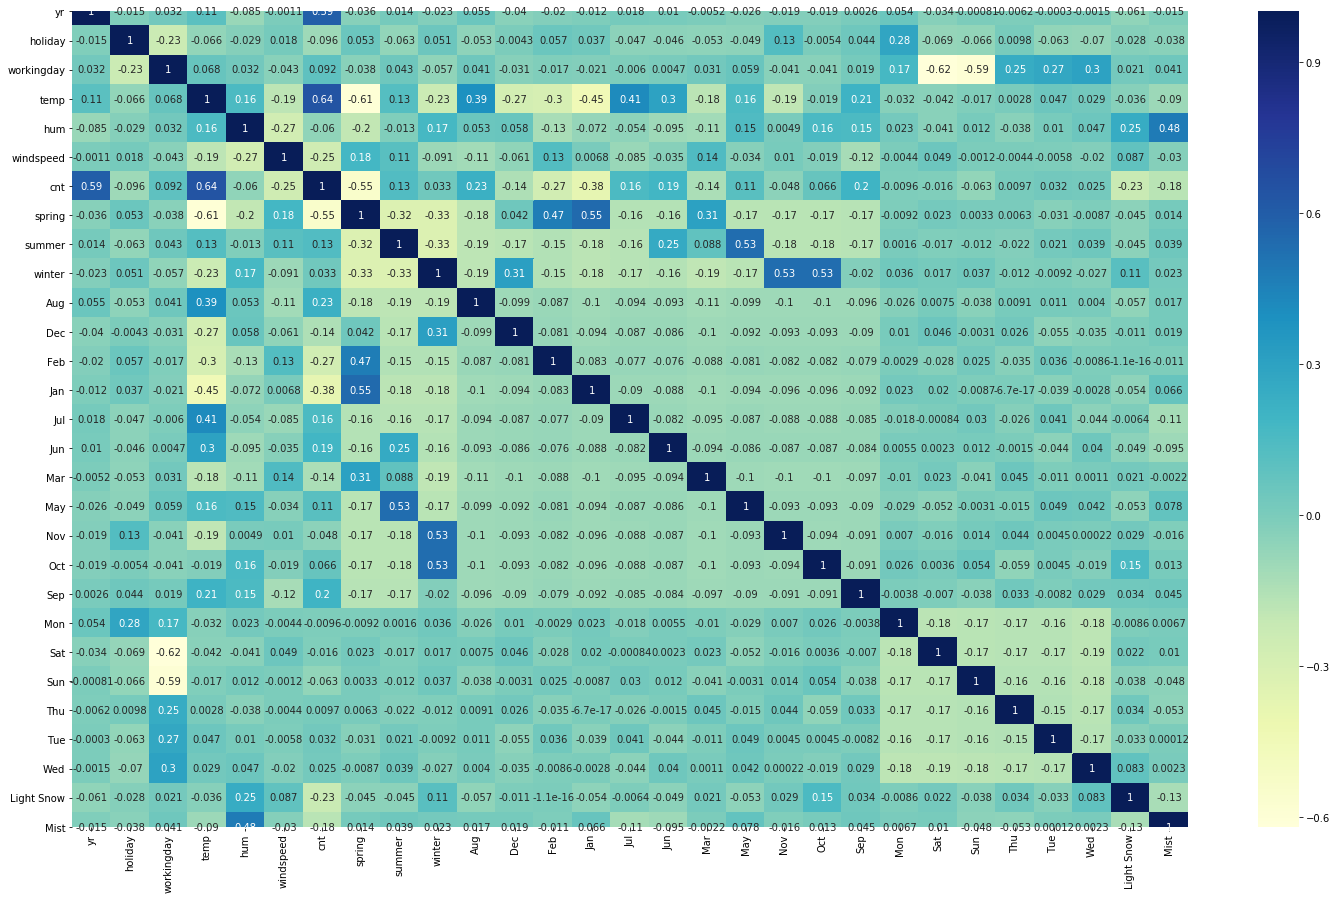

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

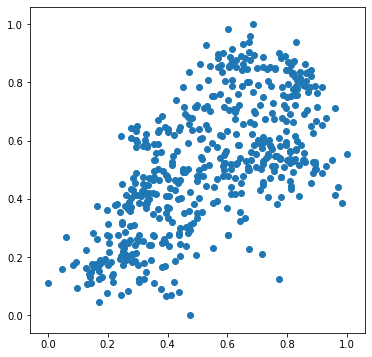

In [45]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

### RFE
Recursive feature elimination

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [55]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.13e-191
Time:                        03:28:49   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

`holiday` is insignificant in presence of other variables; can be dropped

In [56]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

Rebuilding the model without `holiday`

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [58]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [59]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.13e-191
Time:                        03:28:51   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

In [60]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,Sat,4.91
4,windspeed,4.90
5,spring,4.80
11,Sun,4.76
7,winter,3.71
6,summer,3.03
13,Mist,2.31


`hum` has high VIF; can be dropped

In [62]:
# Dropping 'hum'
X_train_new = X_train_new.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [64]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [65]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          5.73e-189
Time:                        03:28:51   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

In [66]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,Sat,4.45
10,Sun,4.21
4,spring,3.82
6,winter,2.80
5,summer,2.75
0,yr,2.07
7,Jul,1.60


`workingday` has high VIF in presence of other variables; can be dropped

In [67]:
# Dropping 'workingday'
X_train_new = X_train_new.drop(["workingday"], axis = 1)

Rebuilding the model without `workingday`

In [68]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [69]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [70]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.01e-186
Time:                        03:28:52   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

In [71]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,summer,2.23
3,spring,2.11
0,yr,2.07
5,winter,1.82
6,Jul,1.59
11,Mist,1.55
7,Sep,1.33
8,Sat,1.22


`sat` is insignificant in presence of other variables as per p-value; can be dropped

In [72]:
X_train_new = X_train_new.drop(["Sat"], axis = 1)

Rebuilding the model without `sat`

In [73]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [74]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [75]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.65e-187
Time:                        03:28:52   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.889      0.0

In [76]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,summer,2.22
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,Jul,1.59
10,Mist,1.55
7,Sep,1.33
8,Sun,1.17


`temp` has high VIF in presence of other variables; can be dropped

In [77]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

Rebuilding the model without `temp`

In [78]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.10e-149
Time:                        03:28:53   Log-Likelihood:                 406.26
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     499   BIC:                            -743.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5889      0.017     34.820      0.0

In [79]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.82
2,spring,2.08
3,summer,2.02
0,yr,1.83
4,winter,1.76
9,Mist,1.51
5,Jul,1.21
7,Sun,1.16
6,Sep,1.15
8,Light Snow,1.08


`Jul` has high p-value in presence of other variables; can be dropped

In [80]:
X_train_new = X_train_new.drop(["Jul"], axis = 1)

Rebuilding the model without `Jul`

In [81]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.44e-150
Time:                        03:28:53   Log-Likelihood:                 406.18
No. Observations:                 510   AIC:                            -792.4
Df Residuals:                     500   BIC:                            -750.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5855      0.015     39.533      0.0

In [82]:
# Calculate the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.49
2,spring,1.91
3,summer,1.86
0,yr,1.78
4,winter,1.64
8,Mist,1.50
6,Sun,1.15
5,Sep,1.13
7,Light Snow,1.08


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
y_train_price = lm.predict(X_train_lm)

In [84]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

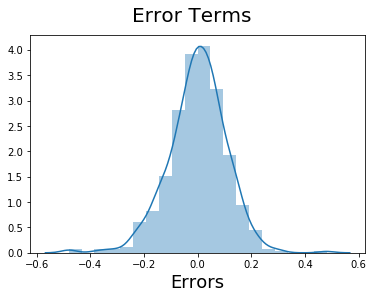

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [86]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [87]:
y_test = df_test.pop('cnt')
X_test = df_test

In [88]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [89]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

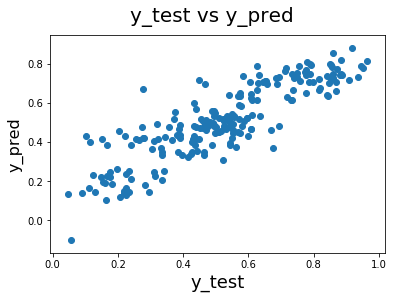

In [90]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7482853326710996

### Conclusion:

The above featuristic model is the best fit model for the US bike-sharing provider **BoomBikes**.
The following below features are important:
1. windspeed
2. spring season
3. summer season
4. yr
5. winter season
6. Mist Weather
7. Sunday as Weekday 
8. September as Month
9. 'Light Snow' as Weather

Overall we have a decent model, but we also acknowledge that we could do better. 